In [1]:
# Standard Libraries
from Lab import *

In [2]:
lab = Lab()


        Imported packages and functions:
        -----------------------------------------
        Imported matplotlib.pyplot as plt
        and imported numpy as np
        and imported pandas as pd
        and imported numpy.fft as fft
        and imported seaborn as sns
        and imported time
        and imported curve_fit from scipy.optimize
        


In [3]:
# Load csv fra en ydre mappe '..' går en mappe tilbage og '/Data' går ind i den ydre mappe Data
df = pd.read_csv('../Cleaned_Data/cleaned_data.csv')
alpha_angle = [3 for angle in df['Angle']]

In [4]:
# Visualiser dataframe
df.head()

,Angle,Kanal B
0,95.0,10.962391
1,100.0,7.514441
2,105.0,6.650151
3,110.0,4.927701
4,115.0,5.788931


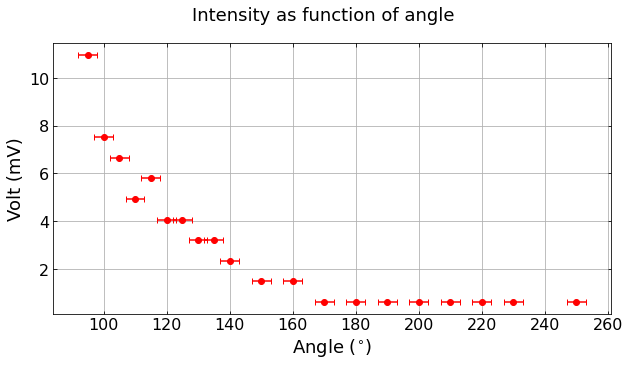

In [5]:
# Plot data
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
fig.suptitle('Intensity as function of angle')
#ax.scatter(df['Angle'], df['Kanal B'], color = 'red', label = 'Data')
ax.errorbar(df['Angle'], df['Kanal B'], c = 'red', fmt = 'o', 
             capsize = 3, xerr = alpha_angle)

# Plot settings
ax.set_xlabel(r'Angle ($^{\circ}$)')
ax.set_ylabel('Volt (mV)')
ax.grid()
#plt.savefig('Intensity_as_function_of_angle_flatline_subtracted.pdf')
plt.show()

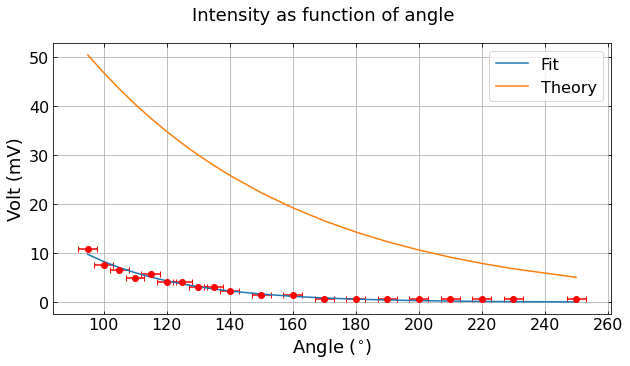

In [6]:
# Plot data
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

def guess(x,a,m):
    return a*np.exp(-m*x)

p0 = 10,0.0148

popt, pcov = curve_fit(guess,df['Angle'],df['Kanal B'], p0=p0, absolute_sigma=True)

fig.suptitle('Intensity as function of angle')
#ax.scatter(df['Angle'], df['Kanal B'], color = 'red', label = 'Data')
ax.errorbar(df['Angle'], df['Kanal B'], c = 'red', fmt = 'o', 
             capsize = 3, xerr = alpha_angle)

ys = [guess(x,popt[0],popt[1]) for x in df['Angle']]
ys_theo = [guess(x,popt[0],0.0148) for x in df['Angle']]

ax.plot(df['Angle'],ys,label='Fit')
ax.plot(df['Angle'],ys_theo,label='Theory')

# Plot settings
ax.set_xlabel(r'Angle ($^{\circ}$)')
ax.set_ylabel('Volt (mV)')
ax.grid()
ax.legend()
#plt.savefig('Intensity_as_function_of_angle_flatline_subtracted.pdf')
plt.show()


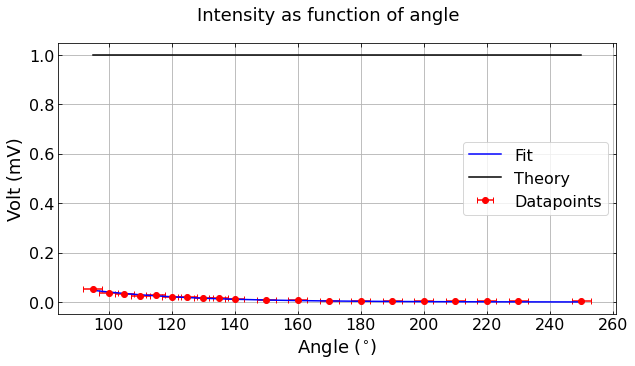

In [7]:
# Plot data
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

df["V_norm"] = df['Kanal B']/popt[0]
ys_norm = [guess(x,popt[0],popt[1]) for x in df['Angle']]/popt[0]
ys_theo = [guess(x,1,0.00) for x in df['Angle']]

fig.suptitle('Intensity as function of angle')
#ax.scatter(df['Angle'], df['Kanal B'], color = 'red', label = 'Data')
ax.errorbar(df['Angle'], df['V_norm'], c = 'red', fmt = 'o', 
             capsize = 3, xerr = alpha_angle, label='Datapoints')


ax.plot(df['Angle'],ys_norm, label='Fit',color='b')
ax.plot(df['Angle'],ys_theo, label='Theory',color='k')

# Plot settings
ax.set_xlabel(r'Angle ($^{\circ}$)')
ax.set_ylabel('Volt (mV)')
ax.grid()
ax.legend()
#plt.savefig('Intensity_as_function_of_angle_flatline_subtracted.pdf')
plt.show()
